In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
import pandas as pd
df=pd.read_csv('/content/gdrive/My Drive/Dataset/train.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [43]:
df.shape

(1201, 10)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [45]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))


Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [46]:
import datetime
datetime.datetime.now().year

2020

In [47]:
df['TotalYears']=datetime.datetime.now().year-df['YearBuilt']
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,TotalYears
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,17
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,44
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,19
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,105
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,20


In [48]:
df.drop(['YearBuilt'],axis=1,inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,TotalYears
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,17
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,44
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,19
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,105
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,20


In [49]:
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"

In [50]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders['MSSubClass']=LabelEncoder()
lbl_encoders['MSSubClass'].fit_transform(df['MSSubClass'])

array([5, 0, 5, ..., 6, 0, 0])

In [51]:
df2=df.copy()

In [52]:
lbl=LabelEncoder()
for feature in cat_features:
  df2[feature]=lbl.fit_transform(df2[feature])


In [53]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,TotalYears
0,5,3,65.0,8450,1,3,856,854,208500,17
1,0,3,80.0,9600,1,3,1262,0,181500,44
2,5,3,68.0,11250,1,0,920,866,223500,19
3,6,3,60.0,9550,1,0,961,756,140000,105
4,5,3,84.0,14260,1,0,1145,1053,250000,20


In [54]:
### Stacking and Converting Into Tensors
import numpy as np
cat_features=np.stack([df2['MSSubClass'],df2['MSZoning'],df2['Street'],df2['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [55]:
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [56]:
### continuos features:
cont_features=[]
for i in df2.columns:
  if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
    pass
  else:
    cont_features.append(i)

In [57]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'TotalYears']

In [58]:
#### Stacking the continuos features and converting them to a tensor:
cont_values=np.stack([df2[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    17.],
        [   80.,  9600.,  1262.,     0.,    44.],
        [   68., 11250.,   920.,   866.,    19.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    79.],
        [   68.,  9717.,  1078.,     0.,    70.],
        [   75.,  9937.,  1256.,     0.,    55.]])

In [59]:
cont_values.dtype

torch.float32

In [60]:
### COnvert Dependent Variable into tensor:
Y=torch.tensor(df2['SalePrice'],dtype=torch.float).reshape(-1,1)
Y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [61]:
cat_features.shape,cont_values.shape,Y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [62]:
#### #### Embedding Size For Categorical columns

In [63]:
cat_dims=[df2[columns].nunique() for columns in ["MSSubClass", "MSZoning", "Street", "LotShape"]]
cat_dims

[15, 5, 2, 4]

In [64]:
### Thumb Rule:Output dimension should be set based on the input dimension ;min(50,(x+1)//2)
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embedded_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embedded_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [66]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [67]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embedded_representation):
    embedding_val.append(e(cat_features[:,i]))

In [68]:
embedding_val

[tensor([[-1.0578,  0.5777, -0.7198,  ...,  1.3946,  0.7841, -1.3548],
         [ 0.6118,  0.8425, -1.5762,  ...,  0.5867,  1.7134,  1.0078],
         [-1.0578,  0.5777, -0.7198,  ...,  1.3946,  0.7841, -1.3548],
         ...,
         [-0.7526, -1.4752, -1.0691,  ...,  0.3058,  0.5478, -1.0497],
         [ 0.6118,  0.8425, -1.5762,  ...,  0.5867,  1.7134,  1.0078],
         [ 0.6118,  0.8425, -1.5762,  ...,  0.5867,  1.7134,  1.0078]],
        grad_fn=<EmbeddingBackward>), tensor([[-1.0072, -1.5412, -0.5827],
         [-1.0072, -1.5412, -0.5827],
         [-1.0072, -1.5412, -0.5827],
         ...,
         [-1.0072, -1.5412, -0.5827],
         [-1.0072, -1.5412, -0.5827],
         [-1.0072, -1.5412, -0.5827]], grad_fn=<EmbeddingBackward>), tensor([[0.1119],
         [0.1119],
         [0.1119],
         ...,
         [0.1119],
         [0.1119],
         [0.1119]], grad_fn=<EmbeddingBackward>), tensor([[ 0.2279,  1.0954],
         [ 0.2279,  1.0954],
         [ 0.6255, -0.3770],
     

In [69]:
z=torch.cat(embedding_val,1)
z

tensor([[-1.0578,  0.5777, -0.7198,  ...,  0.1119,  0.2279,  1.0954],
        [ 0.6118,  0.8425, -1.5762,  ...,  0.1119,  0.2279,  1.0954],
        [-1.0578,  0.5777, -0.7198,  ...,  0.1119,  0.6255, -0.3770],
        ...,
        [-0.7526, -1.4752, -1.0691,  ...,  0.1119,  0.2279,  1.0954],
        [ 0.6118,  0.8425, -1.5762,  ...,  0.1119,  0.2279,  1.0954],
        [ 0.6118,  0.8425, -1.5762,  ...,  0.1119,  0.2279,  1.0954]],
       grad_fn=<CatBackward>)

In [70]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [71]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [72]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [73]:
### Define Loss and Optimizer

In [74]:

loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [75]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=Y[:batch_size-test_size]
y_test=Y[batch_size-test_size:batch_size]

In [76]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [77]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.78125
Epoch number: 11 and the loss : 200493.4375
Epoch number: 21 and the loss : 200489.15625
Epoch number: 31 and the loss : 200482.609375
Epoch number: 41 and the loss : 200473.265625
Epoch number: 51 and the loss : 200461.359375
Epoch number: 61 and the loss : 200446.390625
Epoch number: 71 and the loss : 200429.359375
Epoch number: 81 and the loss : 200408.0
Epoch number: 91 and the loss : 200383.421875
Epoch number: 101 and the loss : 200355.3125
Epoch number: 111 and the loss : 200322.125
Epoch number: 121 and the loss : 200291.40625
Epoch number: 131 and the loss : 200252.0
Epoch number: 141 and the loss : 200206.625
Epoch number: 151 and the loss : 200162.25
Epoch number: 161 and the loss : 200112.25
Epoch number: 171 and the loss : 200059.828125
Epoch number: 181 and the loss : 200005.78125
Epoch number: 191 and the loss : 199946.25
Epoch number: 201 and the loss : 199881.421875
Epoch number: 211 and the loss : 199815.53125
Epoch number: 

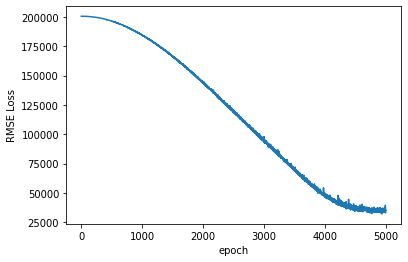

In [78]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [79]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 44985.57421875


In [80]:
#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')

In [81]:

torch.save(model.state_dict(),'HouseWeights.pt')

In [82]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [83]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [84]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)